<a href="https://colab.research.google.com/github/Kundan-CR7/Benford-Buster/blob/main/Benford_Busters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  Galactic Graphs: Visualizing the Wonders of Star Data






<!-- <center> -->
  <h2>Data Visualization Team Members</h2>
  <ul style="font-size: 20px; list-style-type: none;">
    <li><strong>Member1:</strong> Kundan Gupta - <strong>Email:</strong> kundan.gupta@adypu.edu.in</li>
    <li><strong>Member2:</strong> Rohan Kumar - <strong>Email:</strong> rohan.kumar@adypu.edu.in</li>
    <li><strong>Member3:</strong> Yashraj Chouhan - <strong>Email:</strong> yashraj.chouhan@adypu.edu.in</li>
    <li><strong>Member4:</strong> Mridul R - <strong>Email:</strong> mridul.jyothi@adypu.edu.in</li>
  </ul>
<!-- </center> -->





# **Table of Contents**

1) Introduction
Overview of Analysis and Visualization

2) Data Preparation

3) Calculating Proportions of First Digits

4) Visualization of First Digit Distributions

5) Average First Digit Distribution

In [ ]:
import pandas as pd
!gdown --fuzzy "https://drive.google.com/file/d/12vHkcBOK_MjMlGHgJ7RklWJjOW3X1Ihd/view?usp=sharing" -O stars_dataset.csv

df = pd.read_csv('stars_dataset.csv')
df.head()

Downloading...
From: https://drive.google.com/uc?id=12vHkcBOK_MjMlGHgJ7RklWJjOW3X1Ihd
To: /content/stars_dataset.csv
100% 12.9k/12.9k [00:00<00:00, 35.7MB/s]


,No,Star Name,Equatorial Coordinates,Galactic Longitude,Galactic Latitude,Spectral Type,Visual Magnitude,Absolute Magnitude,Parallax,Error,Distance (ly)
0,1,Alpha Canis Majoris Sirius,06 45 -16.7,227.2,-8.9,A1V,-1.46,1.43,379.21,1.58,9
1,2,Alpha Carinae Canopus,06 24 -52.7,261.2,-25.3,F0Ib,-0.73,-5.64,10.43,0.53,310
2,3,Alpha Centauri Rigil Kentaurus,14 40 -60.8,315.8,-0.7,G2V+K1V,-0.29,4.06,742.12,1.40,4
3,7,Beta Orionis Rigel,05 15 -8.2,209.3,-25.1,B8Ia,0.15v,-6.72v,4.22,0.81,770
4,9,Alpha Eridani Achernar,01 38 -57.2,290.7,-58.8,B3V,0.45,-2.77,22.68,0.57,144


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      150 non-null    int64  
 1   Star Name               150 non-null    object 
 2   Equatorial Coordinates  150 non-null    object 
 3   Galactic Longitude      150 non-null    float64
 4   Galactic Latitude       150 non-null    float64
 5   Spectral Type           150 non-null    object 
 6   Visual Magnitude        150 non-null    object 
 7   Absolute Magnitude      150 non-null    object 
 8   Parallax                150 non-null    float64
 9   Error                   150 non-null    float64
 10  Distance (ly)           150 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 13.0+ KB


In [ ]:
df.describe()

,No,Galactic Longitude,Galactic Latitude,Parallax,Error,Distance (ly)
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,147.713333,204.814667,-21.908667,31.825267,0.819467,389.640000
std,87.905558,103.441957,18.939483,74.363499,0.793510,458.451995
min,1.000000,0.900000,-80.700000,1.020000,0.380000,4.000000
25%,65.250000,127.200000,-31.775000,6.677500,0.570000,117.250000
50%,150.500000,219.150000,-15.350000,14.465000,0.750000,222.500000
75%,223.750000,288.625000,-7.000000,27.895000,0.850000,490.000000
max,296.000000,359.200000,-0.400000,742.120000,9.900000,3000.000000


# Function to Extract the First Non-Zero Digit from a Number

In [ ]:
def get_first_digit(x):
    x = str(x)
    for char in x:
        if char.isdigit() and char != '0':
            return int(char)
    return None

# Calculating the Proportion of First Non-Zero Digits in Galactic Longitude (GL1)

In [ ]:
GL1 = df['Galactic Longitude'].dropna().apply(get_first_digit)
GL1_counts = GL1.value_counts(normalize=True).sort_index()
GL1_digit_counts = GL1_counts.reset_index()
GL1_digit_counts.columns = ['Digit_Galatic_Longitude', 'Proportion']
print(GL1_digit_counts)

   Digit_Galatic_Longitude  Proportion
0                        1    0.260000
1                        2    0.366667
2                        3    0.220000
3                        4    0.033333
4                        5    0.013333
5                        6    0.026667
6                        7    0.026667
7                        8    0.013333
8                        9    0.040000


# Visualizing the Distribution of First Digits in Galactic Longitude vs. Benford's Law

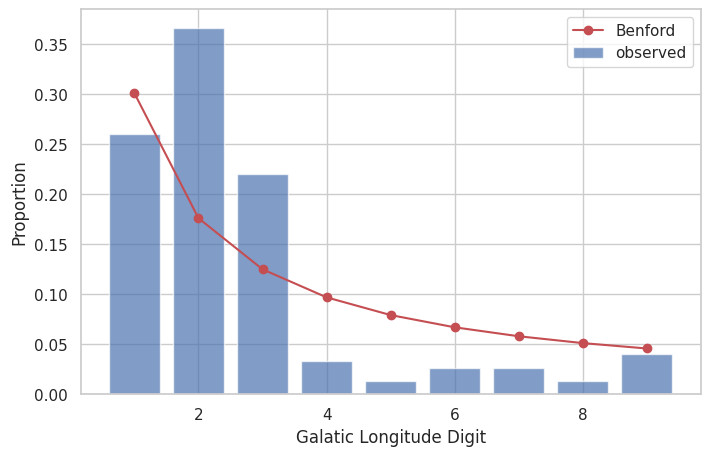

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
x_GL = GL1_digit_counts['Digit_Galatic_Longitude'].values
y_GL = GL1_digit_counts['Proportion'].values
plt.figure(figsize=(8,5))
plt.xlabel('Galatic Longitude Digit')
plt.ylabel('Proportion')
plt.bar(x_GL,y_GL,label="observed",alpha=0.7)
plt.grid(True)
benford = np.log10(1+(1/np.arange(1,10)))
plt.plot(np.arange(1,10),benford,"ro-",label="Benford")
plt.legend()



# Calculating the Proportion of First Non-Zero Digits in Equatorial Coordinates (EC)


In [ ]:
EC = df['Equatorial Coordinates'].dropna().apply(get_first_digit)
EC_counts = EC.value_counts(normalize=True).sort_index()
EC_digit_counts = EC_counts.reset_index()
EC_digit_counts.columns = ['Digit_Equatorial_Coordinates', 'Proportion']
print(EC_digit_counts)

   Digit_Equatorial_Coordinates  Proportion
0                             1    0.340000
1                             2    0.200000
2                             3    0.080000
3                             4    0.066667
4                             5    0.126667
5                             6    0.060000
6                             7    0.046667
7                             8    0.033333
8                             9    0.046667


# Visualizing the Distribution of First Digits in Equatorial Coordinates vs. Benford's Law

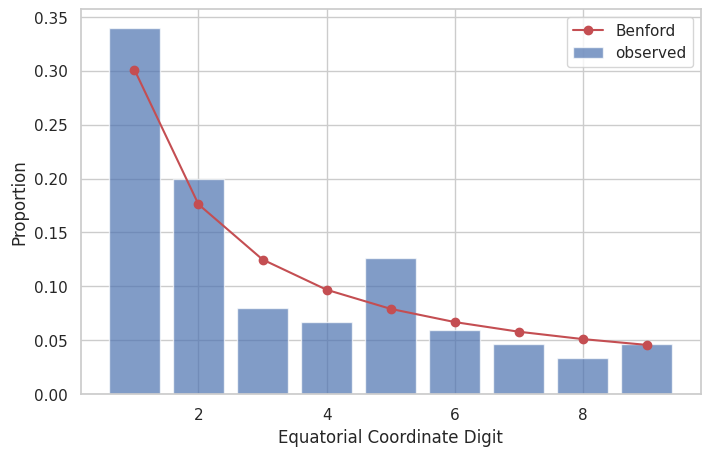

In [ ]:
x_EC = EC_digit_counts['Digit_Equatorial_Coordinates'].values
y_EC = EC_digit_counts['Proportion'].values
plt.figure(figsize=(8,5))
plt.xlabel('Equatorial Coordinate Digit')
plt.ylabel('Proportion')
plt.bar(x_EC,y_EC,label="observed",alpha=0.7)
plt.grid(True)
benford = np.log10(1+(1/np.arange(1,10)))
plt.plot(np.arange(1,10),benford,"ro-",label="Benford")
plt.legend()


# Calculating the Proportion of First Non-Zero Digits in Galactic Latitude (GL2)

In [ ]:
GL2 = df['Galactic Latitude'].dropna().apply(get_first_digit)
GL2_counts = GL2.value_counts(normalize=True).sort_index()
GL2_digit_counts = GL2_counts.reset_index()
GL2_digit_counts.columns = ['Digit_Galactic_Latitude', 'Proportion']
print(GL2_digit_counts)

   Digit_Galactic_Latitude  Proportion
0                        1    0.240000
1                        2    0.166667
2                        3    0.133333
3                        4    0.133333
4                        5    0.100000
5                        6    0.066667
6                        7    0.080000
7                        8    0.053333
8                        9    0.026667


# Visualizing the Distribution of First Digits in Galactic Latitude vs. Benford's Law

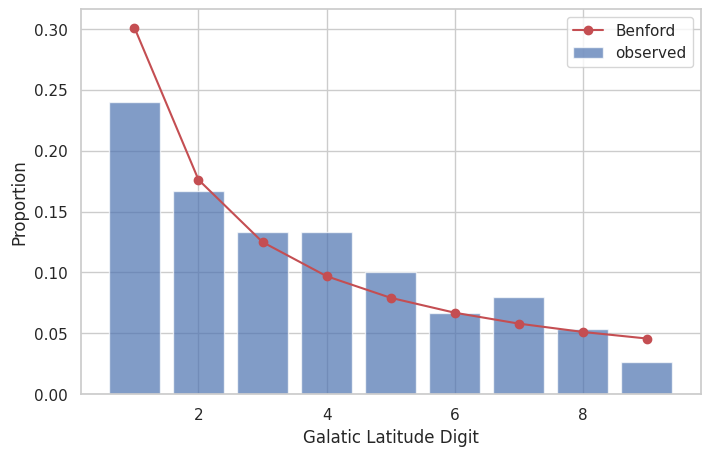

In [ ]:
x_GL2 = GL2_digit_counts['Digit_Galactic_Latitude'].values
y_GL2 = GL2_digit_counts['Proportion'].values
plt.figure(figsize=(8,5))
plt.xlabel('Galatic Latitude Digit')
plt.ylabel('Proportion')
plt.bar(x_GL2,y_GL2,label="observed",alpha=0.7)
plt.grid(True)
benford = np.log10(1+(1/np.arange(1,10)))
plt.plot(np.arange(1,10),benford,"ro-",label="Benford")
plt.legend()


# Calculating the Proportion of First Non-Zero Digits in Visual Magnitude (VM)

In [ ]:
VM = df['Visual Magnitude'].dropna().apply(get_first_digit)
VM_counts = VM.value_counts(normalize=True).sort_index()
VM_digit_counts = VM_counts.reset_index()
VM_digit_counts.columns = ['Digit_Visual_Magnitude', 'Proportion']
print(VM_digit_counts)

   Digit_Visual_Magnitude  Proportion
0                       1    0.140000
1                       2    0.406667
2                       3    0.413333
3                       4    0.006667
4                       5    0.006667
5                       7    0.020000
6                       8    0.006667


# Visualizing the Distribution of First Digits in Visual Magnitude vs. Benford's Law

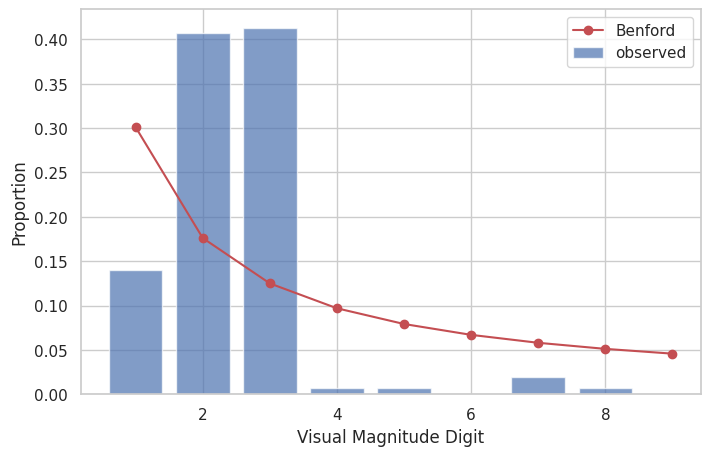

In [ ]:
x_VM = VM_digit_counts['Digit_Visual_Magnitude'].values
y_VM = VM_digit_counts['Proportion'].values
plt.figure(figsize=(8,5))
plt.xlabel('Visual Magnitude Digit')
plt.ylabel('Proportion')
plt.bar(x_VM,y_VM,label="observed",alpha=0.7)
plt.grid(True)
benford = np.log10(1+(1/np.arange(1,10)))
plt.plot(np.arange(1,10),benford,"ro-",label="Benford")
plt.legend()


# Calculating the Proportion of First Non-Zero Digits in Distance (Light Years)

In [ ]:
DL = df['Distance (ly)'].dropna().apply(get_first_digit)
DL_counts = DL.value_counts(normalize=True).sort_index()
DL_digit_counts = DL_counts.reset_index()
DL_digit_counts.columns = ['Digit_Distance_(ly)', 'Proportion']
print(DL_digit_counts)

   Digit_Distance_(ly)  Proportion
0                    1    0.306667
1                    2    0.186667
2                    3    0.093333
3                    4    0.086667
4                    5    0.080000
5                    6    0.066667
6                    7    0.073333
7                    8    0.046667
8                    9    0.060000


# Visualizing the Distribution of First Digits in Distance (Light Years) vs. Benford's Law

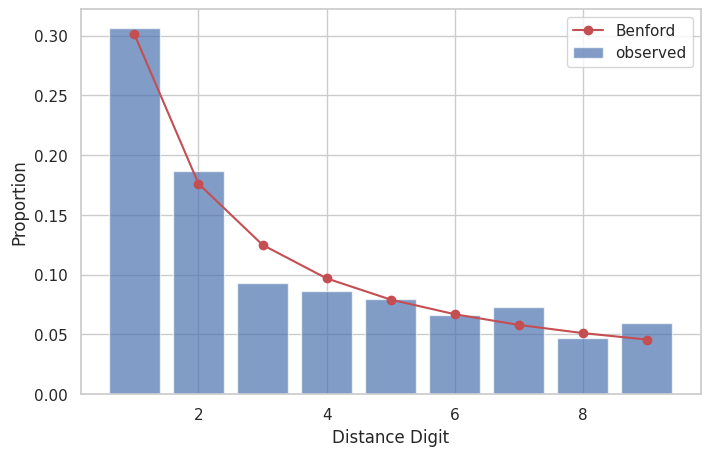

In [ ]:
x_DL = DL_digit_counts['Digit_Distance_(ly)'].values
y_DL = DL_digit_counts['Proportion'].values
plt.figure(figsize=(8,5))
plt.xlabel('Distance Digit')
plt.ylabel('Proportion')
plt.bar(x_DL,y_DL,label="observed",alpha=0.7)
plt.grid(True)
benford = np.log10(1+(1/np.arange(1,10)))
plt.plot(np.arange(1,10),benford,"ro-",label="Benford")
plt.legend()


# Calculating the Proportion of First Non-Zero Digits in Error Values

In [ ]:
Er = df['Error'].dropna().apply(get_first_digit)
Er_counts = Er.value_counts(normalize=True).sort_index()
Er_digit_counts = Er_counts.reset_index()
Er_digit_counts.columns = ['Digit_Error', 'Proportion']
print(Er_digit_counts)


   Digit_Error  Proportion
0            1    0.046667
1            2    0.013333
2            3    0.006667
3            4    0.093333
4            5    0.193333
5            6    0.106667
6            7    0.226667
7            8    0.180000
8            9    0.133333


# Visualizing the Distribution of First Digits in Error Values vs. Benford's Law

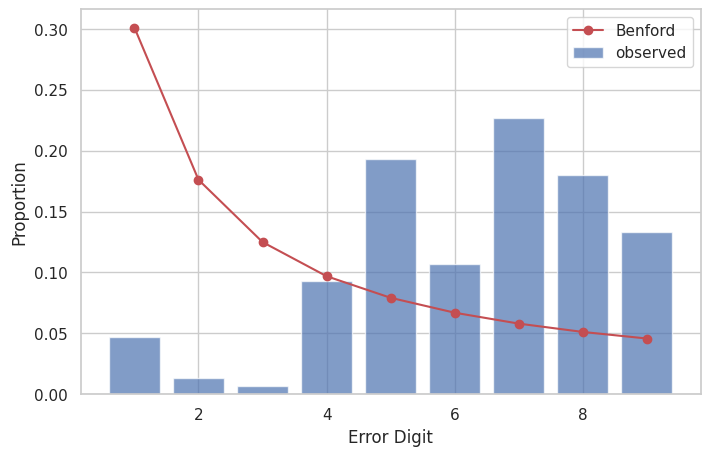

In [ ]:
x_Er = Er_digit_counts['Digit_Error'].values
y_Er = Er_digit_counts['Proportion'].values
plt.figure(figsize=(8,5))
plt.xlabel('Error Digit')
plt.ylabel('Proportion')
plt.bar(x_Er,y_Er,label="observed",alpha=0.7)
plt.grid(True)
benford = np.log10(1+(1/np.arange(1,10)))
plt.plot(np.arange(1,10),benford,"ro-",label="Benford")
plt.legend()


# Calculating the Proportion of First Non-Zero Digits in Parallax Values

In [ ]:
PX = df['Parallax'].dropna().apply(get_first_digit)
PX_counts = PX.value_counts(normalize=True).sort_index()
PX_digit_counts = PX_counts.reset_index()
PX_digit_counts.columns = ['Digit_Parallax', 'Proportion']
print(PX_digit_counts)


   Digit_Parallax  Proportion
0               1    0.313333
1               2    0.193333
2               3    0.126667
3               4    0.100000
4               5    0.066667
5               6    0.060000
6               7    0.080000
7               8    0.033333
8               9    0.026667


# Visualizing the Distribution of First Digits in Parallax Values vs. Benford's Law

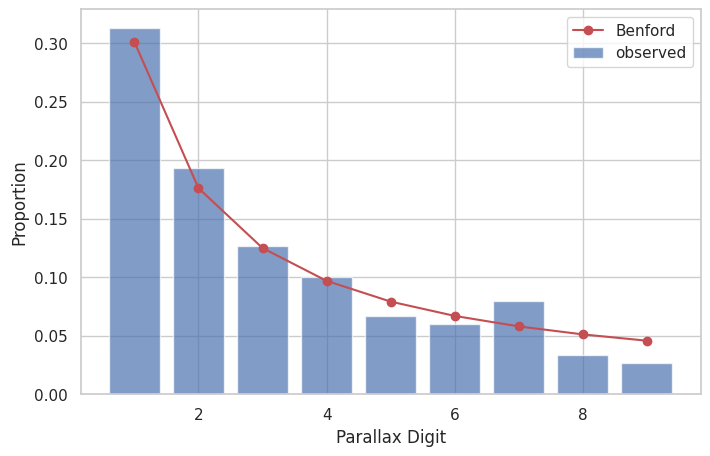

In [ ]:
x_PX = PX_digit_counts['Digit_Parallax'].values
y_PX = PX_digit_counts['Proportion'].values
plt.figure(figsize=(8,5))
plt.xlabel('Parallax Digit')
plt.ylabel('Proportion')
plt.bar(x_PX,y_PX,label="observed",alpha=0.7)
plt.grid(True)
benford = np.log10(1+(1/np.arange(1,10)))
plt.plot(np.arange(1,10),benford,"ro-",label="Benford")
plt.legend()


# Calculating the Proportion of First Non-Zero Digits in Absolute Magnitude (AM)

In [ ]:
AM = df['Absolute Magnitude'].dropna().apply(get_first_digit)
AM_counts = AM.value_counts(normalize=True).sort_index()
AM_digit_counts = AM_counts.reset_index()
AM_digit_counts.columns = ['Digit_Absolute_Magnitude', 'Proportion']
print(AM_digit_counts)


   Digit_Absolute_Magnitude  Proportion
0                         1    0.266667
1                         2    0.160000
2                         3    0.153333
3                         4    0.133333
4                         5    0.106667
5                         6    0.080000
6                         7    0.026667
7                         8    0.040000
8                         9    0.033333


# Visualizing the Distribution of First Digits in Absolute Magnitude vs. Benford's Law

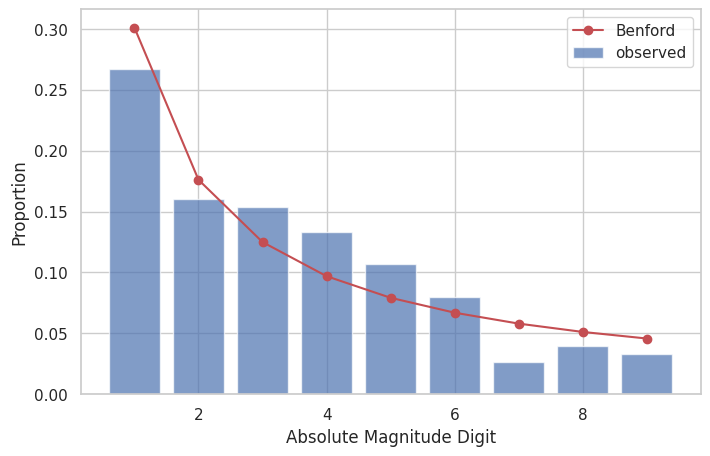

In [ ]:
x_AM = AM_digit_counts['Digit_Absolute_Magnitude'].values
y_AM = AM_digit_counts['Proportion'].values
plt.figure(figsize=(8,5))
plt.xlabel('Absolute Magnitude Digit')
plt.ylabel('Proportion')
plt.bar(x_AM,y_AM,label="observed",alpha=0.7)
plt.grid(True)
benford = np.log10(1+(1/np.arange(1,10)))
plt.plot(np.arange(1,10),benford,"ro-",label="Benford")
plt.legend()


# Comparing Distributions of First Digits Across Multiple Columns with Benford's Law

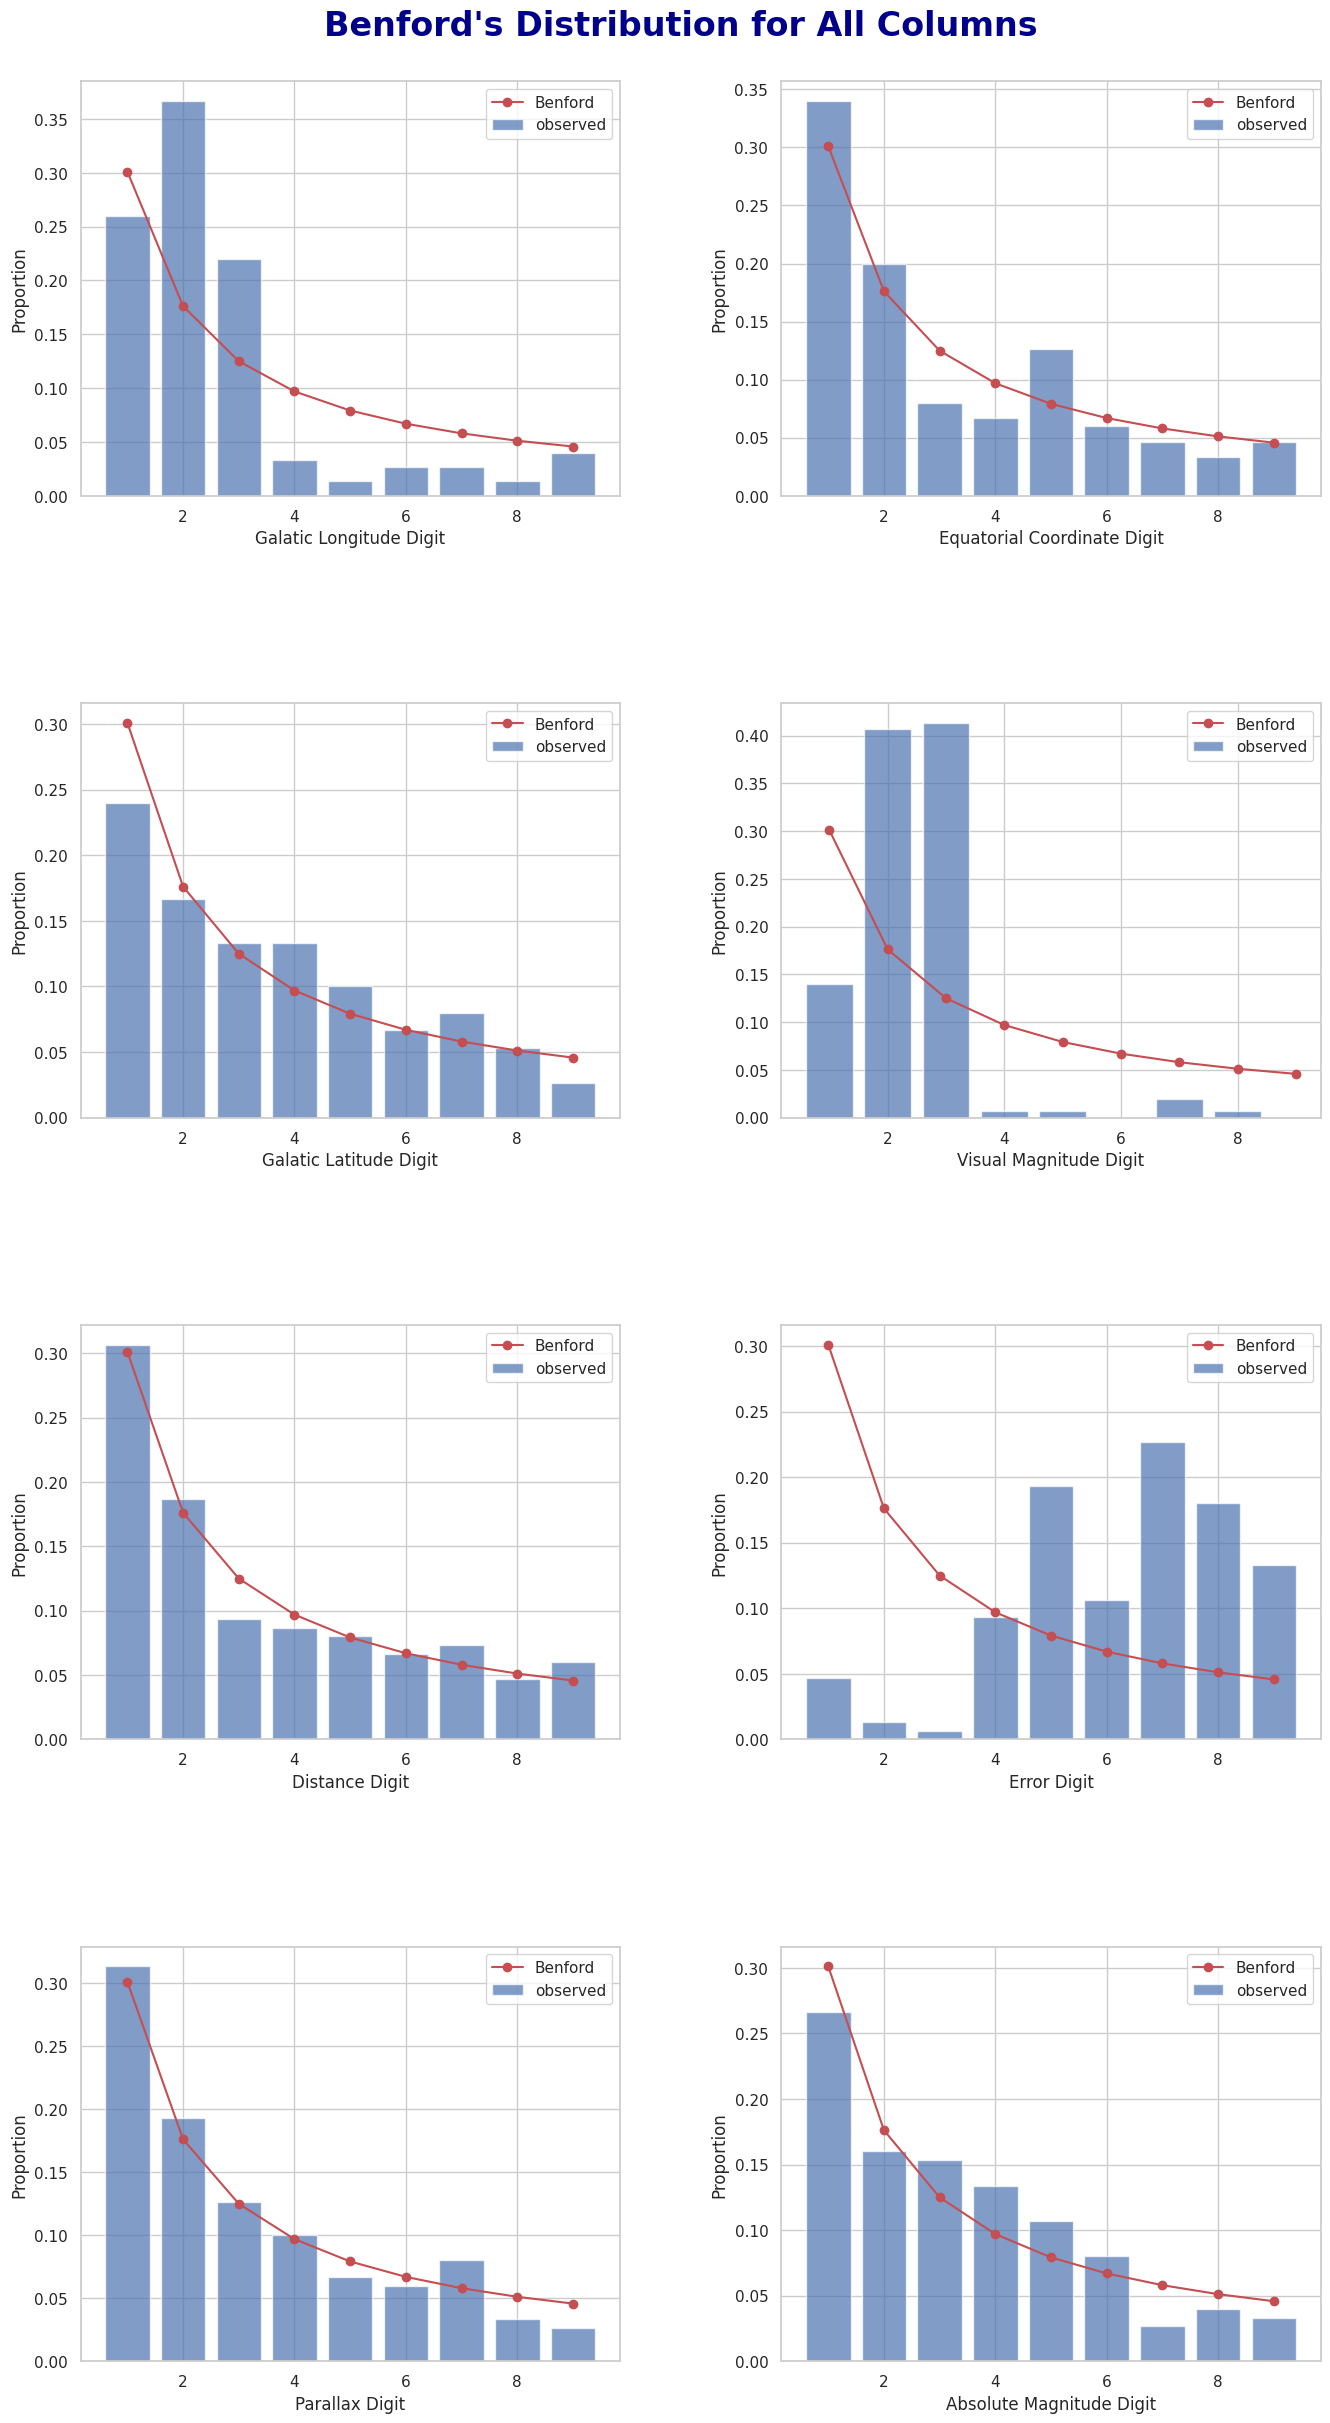

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4, 2, figsize=(16, 24))
fig.subplots_adjust(hspace=0.6, wspace=0.3)

benford = np.log10(1 + (1 / np.arange(1, 10)))

data_list = [
    (GL1_digit_counts, 'Digit_Galatic_Longitude', 'Proportion', 'Galatic Longitude Digit', 'Proportion', 'GL Digit', 'observed'),
    (EC_digit_counts, 'Digit_Equatorial_Coordinates', 'Proportion', 'Equatorial Coordinate Digit', 'Proportion', 'EC Digit', 'observed'),
    (GL2_digit_counts, 'Digit_Galactic_Latitude', 'Proportion', 'Galatic Latitude Digit', 'Proportion', 'GL Digit', 'observed'),
    (VM_digit_counts, 'Digit_Visual_Magnitude', 'Proportion', 'Visual Magnitude Digit', 'Proportion', 'Visual Magnitude Digit', 'observed'),
    (DL_digit_counts, 'Digit_Distance_(ly)', 'Proportion', 'Distance Digit', 'Proportion', 'Distance Digit', 'observed'),
    (Er_digit_counts, 'Digit_Error', 'Proportion', 'Error Digit', 'Proportion', 'Error Digit', 'observed'),
    (PX_digit_counts, 'Digit_Parallax', 'Proportion', 'Parallax Digit', 'Proportion', 'Parallax Digit', 'observed'),
    (AM_digit_counts, 'Digit_Absolute_Magnitude', 'Proportion', 'Absolute Magnitude Digit', 'Proportion', 'Absolute Magnitude Digit', 'observed')
]

fig.suptitle("Benford's Distribution for All Columns",
             fontsize=24,
             fontweight='bold',
             color='darkblue',
             va='top')
fig.subplots_adjust(top=0.95, bottom=0, hspace=0.5, wspace=0.3)

for i, (data, digit_col, prop_col, xlabel, ylabel, title, label) in enumerate(data_list):
    x = data[digit_col].values
    y = data[prop_col].values
    ax = axes[i//2, i%2]
    ax.bar(x, y, label=label, alpha=0.7)
    ax.plot(np.arange(1, 10), benford, "ro-", label="Benford")
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

    ax.grid(True)
    ax.legend()

plt.show()


# Comparing First Digit Distributions Across Multiple Attributes with Benford's Law

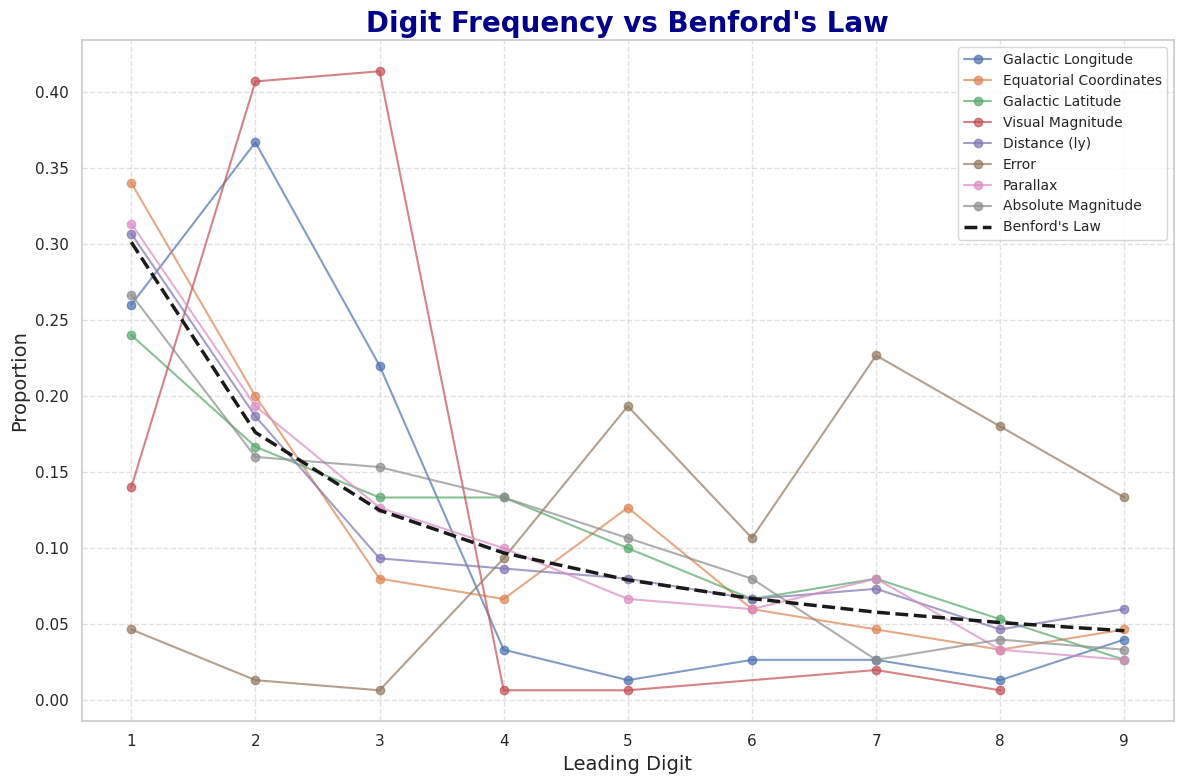

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

benford = np.log10(1 + (1 / np.arange(1, 10)))

data_list = [
    (GL1_digit_counts, 'Digit_Galatic_Longitude', 'Proportion', 'Galactic Longitude'),
    (EC_digit_counts, 'Digit_Equatorial_Coordinates', 'Proportion', 'Equatorial Coordinates'),
    (GL2_digit_counts, 'Digit_Galactic_Latitude', 'Proportion', 'Galactic Latitude'),
    (VM_digit_counts, 'Digit_Visual_Magnitude', 'Proportion', 'Visual Magnitude'),
    (DL_digit_counts, 'Digit_Distance_(ly)', 'Proportion', 'Distance (ly)'),
    (Er_digit_counts, 'Digit_Error', 'Proportion', 'Error'),
    (PX_digit_counts, 'Digit_Parallax', 'Proportion', 'Parallax'),
    (AM_digit_counts, 'Digit_Absolute_Magnitude', 'Proportion', 'Absolute Magnitude')
]

plt.figure(figsize=(12, 8))
for data, digit_col, prop_col, label in data_list:
    x = data[digit_col].values
    y = data[prop_col].values
    plt.plot(x, y, marker='o', linestyle='-', label=label, alpha=0.7)

plt.plot(np.arange(1, 10), benford, "k--", linewidth=2.5, label="Benford's Law")

plt.title("Digit Frequency vs Benford's Law", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Leading Digit", fontsize=14)
plt.ylabel("Proportion", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(1, 10))
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()


# Average First Digit Distribution Across All Attributes vs Benford's Law

<ipython-input-111-c04ca3fe9421>:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.arange(1, 10), benford, "k--", linewidth=2.5, label="Benford's Law", color='red')


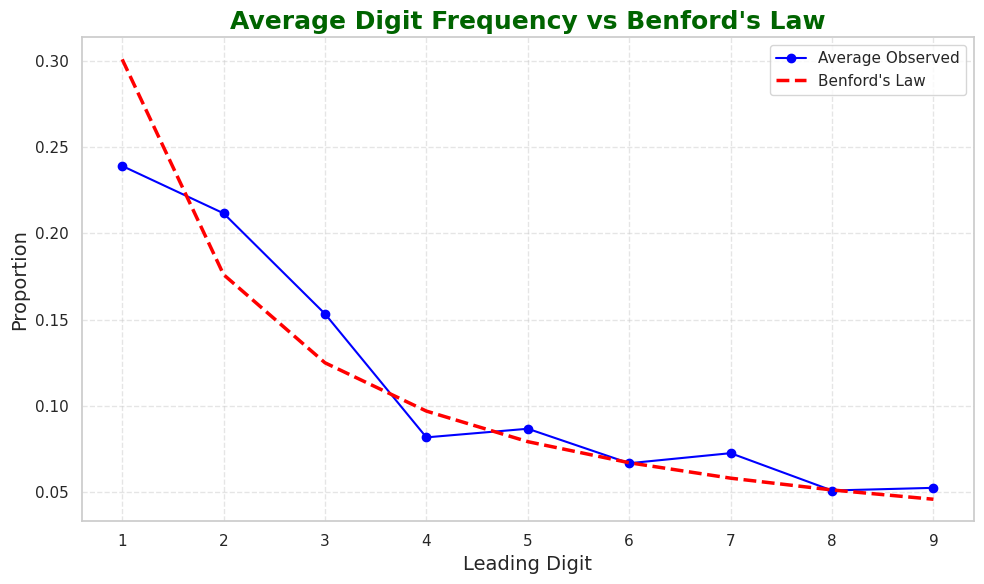

In [ ]:
benford = np.log10(1 + (1 / np.arange(1, 10)))

data_list = [
    (GL1_digit_counts, 'Digit_Galatic_Longitude', 'Proportion'),
    (EC_digit_counts, 'Digit_Equatorial_Coordinates', 'Proportion'),
    (GL2_digit_counts, 'Digit_Galactic_Latitude', 'Proportion'),
    (VM_digit_counts, 'Digit_Visual_Magnitude', 'Proportion'),
    (DL_digit_counts, 'Digit_Distance_(ly)', 'Proportion'),
    (Er_digit_counts, 'Digit_Error', 'Proportion'),
    (PX_digit_counts, 'Digit_Parallax', 'Proportion'),
    (AM_digit_counts, 'Digit_Absolute_Magnitude', 'Proportion')
]

all_counts = pd.DataFrame()

for df, digit_col, prop_col in data_list:
    temp = df[[digit_col, prop_col]].copy()
    temp.columns = ['Digit', 'Proportion']
    temp.set_index('Digit', inplace=True)
    all_counts = pd.concat([all_counts, temp], axis=1)

mean_distribution = all_counts.mean(axis=1).sort_index()

plt.figure(figsize=(10, 6))
plt.plot(mean_distribution.index, mean_distribution.values, marker='o', linestyle='-', label='Average Observed', color='blue')
plt.plot(np.arange(1, 10), benford, "k--", linewidth=2.5, label="Benford's Law", color='red')

plt.title("Average Digit Frequency vs Benford's Law", fontsize=18, fontweight='bold', color='darkgreen')
plt.xlabel("Leading Digit", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.xticks(np.arange(1, 10))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## 🧠 Team Contributions

### 📊 Kundan Gupta
- Data preprocessing & exploration  
- Created get_first_digit() function  
- Prepared dataset overview slide  

---

### 📈 Rohan Kumar
- Extracted digits for 4 columns  
- Built Benford comparison plots  
- Explained Benford’s Law mathematically  

---

### 📉 Yashraj Chouhan
- Analyzed remaining dataset columns  
- Created subplot grid of digit distributions  
- Compared Benford's expected values  

---

### 📋 Mridul R
- Overall analysis & mean distribution comparison  
- Added summary, conclusion, intro, and thank-you slides  

---

### 🔄 Common Contribution
- GitHub clean commits  
- Full .ipynb notebook  
- PPT Generation  
- Detailed README file